In [1]:
import numpy as np
import pandas as pd

In [2]:
from ecog_speech import datasets

*****

output cleared to make views cleaner

In [ ]:
hvs_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')
hvs = datasets.HarvardSentences(hvs_tuples, pre_processing_pipeline='audio_gate_speaking_only')

In [4]:
dl = hvs.to_dataloader(num_workers=4, batch_size=128)

batch_d = next(iter(dl))

***

output cleared to make views cleaner

In [ ]:
hvs_cv_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-22')
hvs_cv = datasets.HarvardSentences(hvs_cv_tuples, pre_processing_pipeline='audio_gate_speaking_only')

In [7]:
cv_dl = hvs_cv.to_dataloader(num_workers=4, batch_size=128)

cv_batch_d = next(iter(dl))

****

In [8]:
from ecog_speech.models import base_transformers

cog2vec = base_transformers.CoG2Vec((1, 256), feature_model=None, context_model=None, projection_model=None, 
                                    negatives_from_everywhere=True, feature_grad_mult=.1,
                                    n_negatives=50, codebook_negatives=25, cross_sample_negatives=25,
                                    mask_length=4,
                                    # adjust this (and perhaps quant_num_groups) to tweak t
                                    # the complexity of underlying encoding
                                    quant_num_vars=50
                                   )
init_mask_embedding = cog2vec.mask_embedding.detach().cpu().clone()
cog2vec.t_feat_o.shape

2022-03-27 14:08:39 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


torch.Size([16, 256, 18])

In [14]:
init_mask_embed = init_mask_embedding

****

In [9]:
from ecog_speech.models import base_transformers

trainer = base_transformers.Cog2VecTrainer(model_map=dict(model=cog2vec), opt_map=dict(),
                                           train_data_gen=dl, cv_data_gen=cv_dl, 
                                           lr_adjust_on_cv_loss=True,
                                            lr_adjust_on_plateau_kws=dict(verbose=True, patience=5),
                                           learning_rate=0.0001)
# These are just static attrs - may make them ctor params
trainer.squeeze_first=False # Need to remove the channel dim when using fairseq wave2vec2 feature extractor

# Current thinking:
#   The codebook will collapse and return all the same values unless the loss is competative and the code is
#   not too big. So weight code book usage high
trainer.ppl_weight = 100

In [10]:
res = trainer.train(30)

Training epoch:   0%|                                                                                         …

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

-loss-:   0%|                                                                                                 …

Eval:   0%|          | 0/225 [00:00<?, ?it/s]

losses and results 

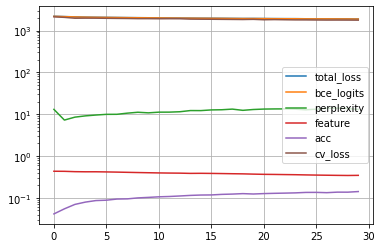

In [11]:
res_df = pd.DataFrame(res).T
ax = res_df.plot(logy=True, grid=True)

acc is on training data

<AxesSubplot:>

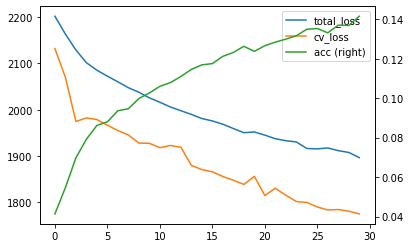

In [12]:
res_df[['total_loss', 'cv_loss', 'acc']].plot(secondary_y='acc')

### dist of change in mask embedding elements

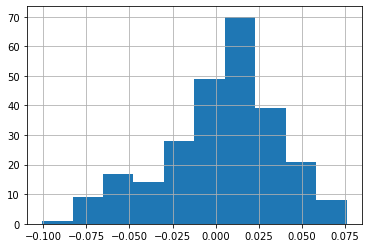

In [15]:
mask_embed = cog2vec.mask_embedding.detach().cpu().clone()

ax = pd.Series((init_mask_embed - mask_embed).detach().cpu()).hist()

***

### Run on all data, not just speaking

In [ ]:
hvs_all_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')

hvs_all = datasets.HarvardSentences(hvs_all_tuples, pre_processing_pipeline='audio_gate')

In [21]:
# Take best model instead of last model
#cog2vec.load_state_dict(trainer.best_model_state)

<All keys matched successfully>

In [19]:
from tqdm.auto import tqdm
import torch

results_l = list()

#cog2vec.eval()
m = cog2vec.to(trainer.device).eval()
#_dl = cv_dl
_dl = hvs_all.to_dataloader(num_workers=4, batch_size=256)
#sens_id = 10
for batch_d in tqdm(_dl, desc="Batching"):
    X_barr = batch_d['signal_arr'].to(trainer.device)
    # Select a single sensor for now and remove the singleton dimension
    sens_id = np.random.randint(0, X_barr.shape[1])
    
    X = X_barr.select(1, sens_id).unsqueeze(1)
    
    with torch.no_grad():
        feat_d = m.forward(X, features_only=True, mask=False)
        results_l.append(
            dict(text_arr=batch_d['text_arr'],
                 #signal_arr=batch_d['signal_arr'].detach().cpu().numpy(),
                **{n:arr.detach().cpu().numpy() for n, arr in feat_d.items()}))

Batching:   0%|          | 0/206 [00:00<?, ?it/s]

Shapes of each batch output

In [21]:
{k: a.shape for k, a in results_l[0].items()}

{'text_arr': torch.Size([256, 1]),
 'x': (256, 18, 256),
 'features': (256, 18, 256)}

Concat into arrays and load into pandas objects

In [22]:
all_x = np.concatenate([r['x'] for r in results_l])
all_x_df = pd.DataFrame(all_x.reshape(all_x.shape[0], -1))

all_feats = np.concatenate([r['features'] for r in results_l])
all_feats_df = pd.DataFrame(all_feats.reshape(all_feats.shape[0], -1))

all_y = np.concatenate([r['text_arr'] for r in results_l])
all_y_s = pd.Series(all_y.squeeze(), name='is_speaking')

### inspect outputs
- x are the data from context model
- features are data from feature extraction model (conv)

In [23]:
%%time
all_x_df.describe()

CPU times: user 29.6 s, sys: 774 µs, total: 29.6 s
Wall time: 49.7 s


,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
count,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,...,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000,52736.000000
mean,-0.591623,-0.137259,0.008249,0.174105,0.168265,-0.173579,0.017921,0.590585,-0.465767,-0.527473,...,0.481497,0.358643,-0.362435,0.013457,0.415096,0.296911,0.010265,-0.290204,0.326403,-0.194516
std,1.024511,1.111427,1.102163,0.600836,0.943953,1.132539,0.694283,0.853498,0.870390,0.935557,...,0.790915,0.982516,0.655989,0.886086,0.918453,1.487359,1.125634,0.934935,0.709153,0.829496
min,-3.417719,-2.636569,-3.766231,-2.115310,-3.191349,-3.756038,-2.992617,-2.367301,-4.553163,-3.210098,...,-2.386014,-3.262866,-3.176754,-2.884469,-3.360168,-4.801082,-3.680985,-3.108575,-2.401768,-3.078938
25%,-1.352306,-1.039754,-0.820777,-0.248504,-0.503421,-0.968507,-0.441950,-0.061786,-1.046931,-1.227312,...,-0.089182,-0.326584,-0.787170,-0.705745,-0.189318,-0.587571,-0.881334,-1.007843,-0.188981,-0.731922
50%,-0.649540,-0.217396,0.040975,0.182101,0.217435,-0.141131,0.031821,0.584736,-0.461628,-0.597322,...,0.461515,0.389014,-0.370021,0.081614,0.401282,0.438361,0.041862,-0.462127,0.313925,-0.229091
75%,0.074340,0.726178,0.844291,0.602147,0.857001,0.615792,0.505206,1.206870,0.118293,0.110047,...,1.011778,1.102412,0.057881,0.741768,1.055848,1.337460,0.897070,0.344473,0.866539,0.289900
max,2.788640,3.102106,3.076792,2.585307,2.896335,3.666844,2.605560,3.799212,3.252771,2.422534,...,3.552562,3.613832,2.276153,2.433499,3.575921,4.373945,3.803227,2.657202,3.111866,2.518294


Correlate features with speaking/not-speaking

In [24]:
corr_speak_df = all_x_df.corrwith(all_y_s)

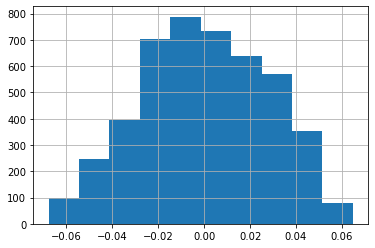

In [25]:
ax = corr_speak_df.hist()

In [26]:
def pca_and_plot(_df):

    from sklearn.decomposition import PCA

    _pca_arr = PCA(2).fit_transform(_df)

    _pca_df = pd.DataFrame(_pca_arr)
    
    ax = _pca_df.plot.scatter(x=0, y=1, alpha=0.3, c=all_y_s, cmap='tab10', sharex=False)
    fig = ax.get_figure()
    fig.patch.set_facecolor('white')
    return _pca_df, fig, ax

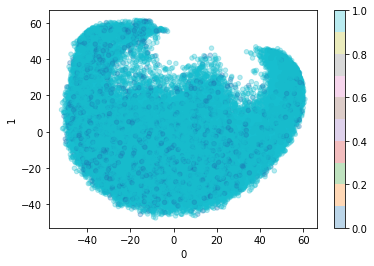

In [27]:
_pca_df, fig, axs = pca_and_plot(all_x_df)

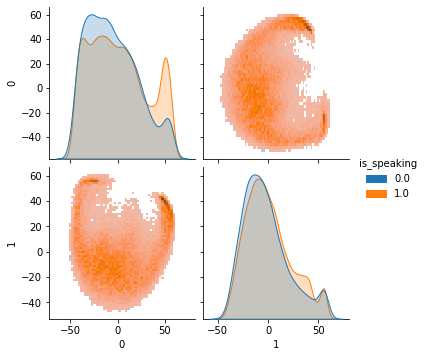

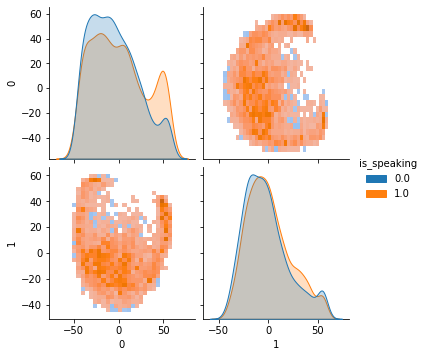

In [60]:
import seaborn as sns
_plt_df = _pca_df.join(all_y_s)
plt_kws = dict( hue='is_speaking', diag_kws=dict(common_norm=False), kind='hist',
             diag_kind='kde',)
sns.pairplot(_plt_df, **plt_kws)
sns.pairplot(_plt_df.groupby(all_y_s.name).sample(3000), **plt_kws)
#sns.pairplot(_plt_df, hue='is_speaking', diag_kws=dict(common_norm=True), kind='hist',
#             diag_kind='kde',)


In [ ]:
# NxN correlation - need parallel frameworkt to be reasonable
#all_x_corr = all_x_df.corr()

inspect context output features

In [36]:
pp_cols = np.random.choice(all_x_df.columns, 5, replace=False)
pp_df = all_x_df[pp_cols].join(all_y_s)

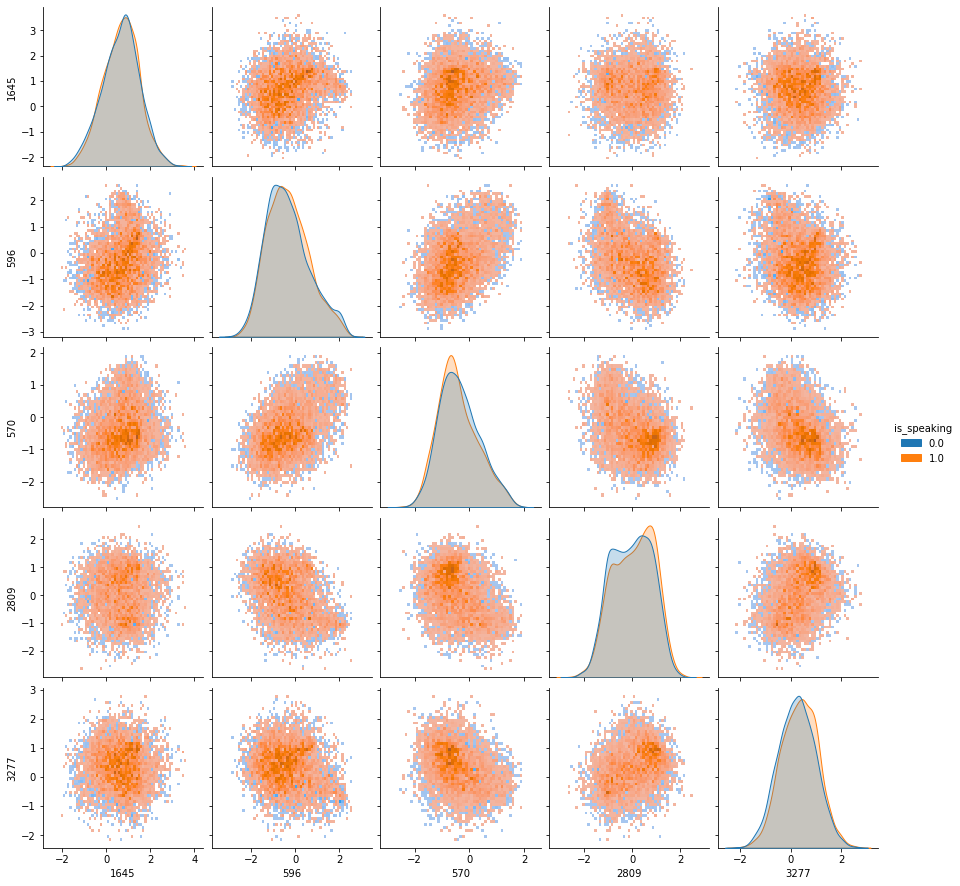

In [56]:
sns.pairplot(pp_df.groupby(all_y_s.name).sample(4000), hue='is_speaking', kind='hist',
             diag_kind='kde', diag_kws=dict(common_norm=False),
             plot_kws=dict( binwidth=0.1)
            )

CPU times: user 1min 21s, sys: 24.4 s, total: 1min 45s
Wall time: 1min 5s


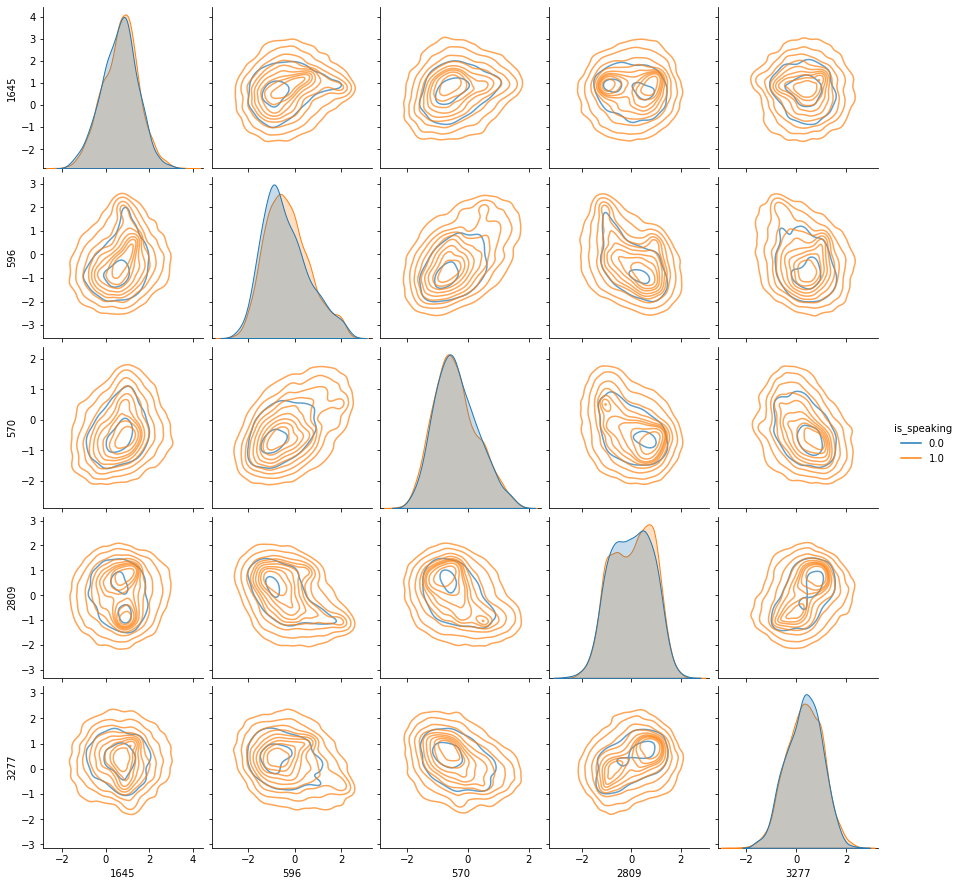

In [58]:
%%time
sns.pairplot(pp_df.sample(10000), hue='is_speaking', kind='kde', diag_kws=dict(common_norm=False), plot_kws=dict(alpha=0.7))